In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import warnings
warnings.filterwarnings("ignore")

In [2]:
filepath = r"C:\Users\user\Downloads\Dataset"
filename = "suv_data.csv"
df = pd.read_csv(os.path.join(filepath,filename), encoding= "unicode escape")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df["User ID"].nunique()

400

In [6]:
df = df.drop(["User ID"],axis=1)

In [7]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Univariate Analysis

In [9]:
# Univariate analysis using function
def plot(x,in_data):
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(df[x],ax=axes[0], kde=False)
    sns.boxplot(df[x],ax=axes[1], orient="h",showmeans=True, color="pink")
    fig.suptitle("Univariate Analysis of " +x,fontsize=15)
    plt.show()

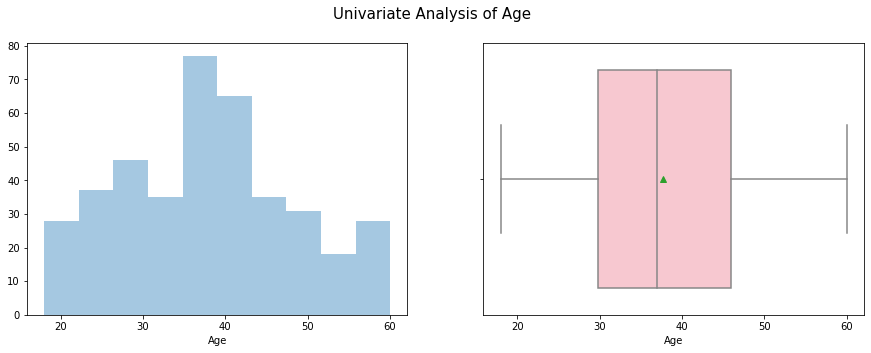

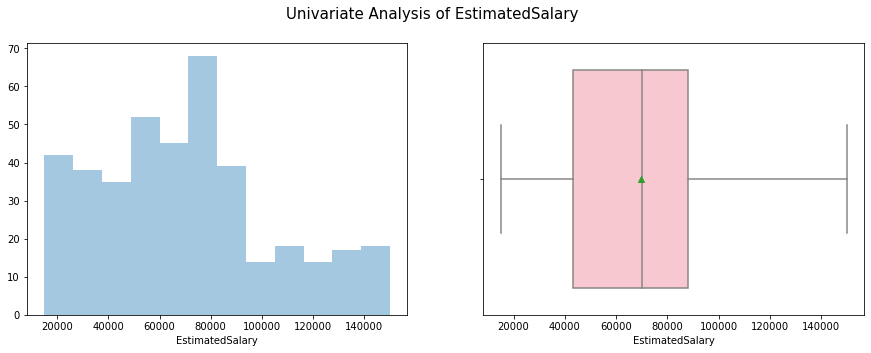

In [10]:
x_axis = ["Age", "EstimatedSalary"]
for col in x_axis:
    plot(x=col,in_data=df)

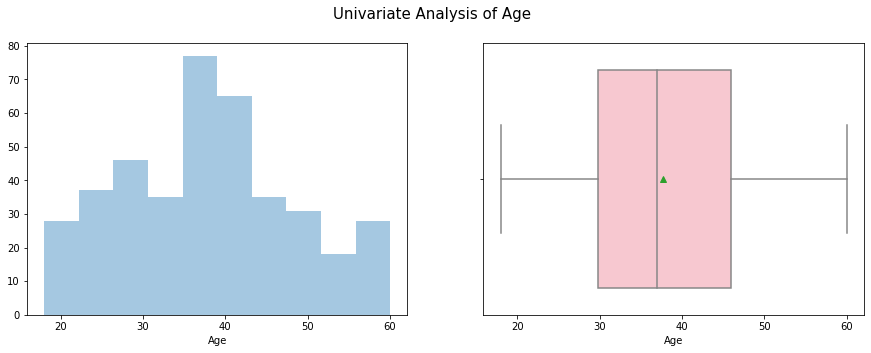

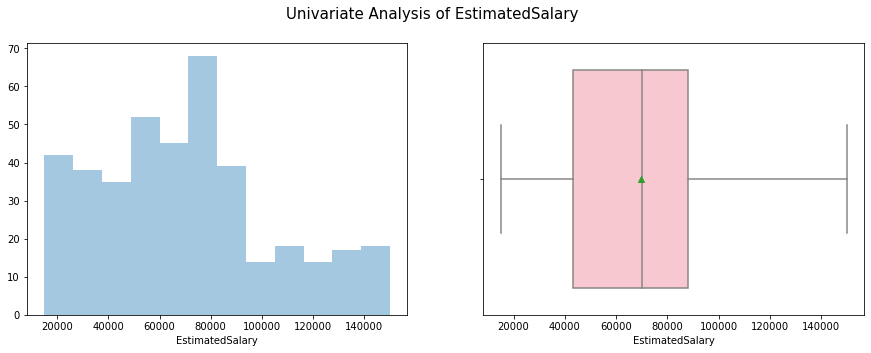

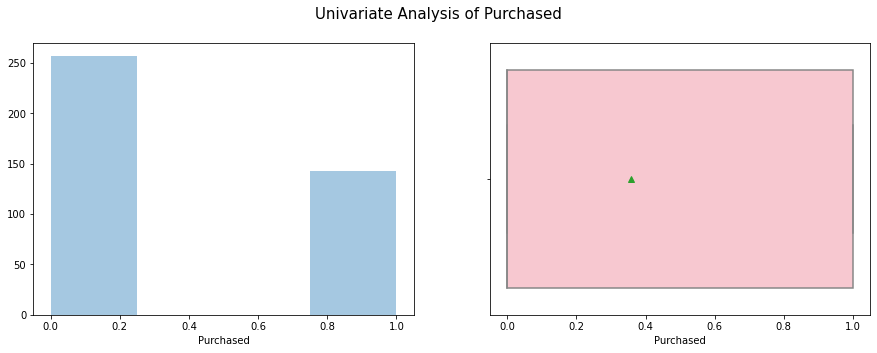

In [11]:
#Univariate analysis another Way

x_axis = ["Age", "EstimatedSalary","Purchased"]
for x in x_axis:
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(df[x],ax=axes[0], kde=False)
    sns.boxplot(df[x],ax=axes[1], orient="h",showmeans=True, color="pink")
    fig.suptitle("Univariate Analysis of " +x,fontsize=15)
    plt.show()

In [12]:
def scatter (x,y,in_data):
    plt.scatter(x,y, data=in_data)
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=15)
    plt.grid()
    plt.show()

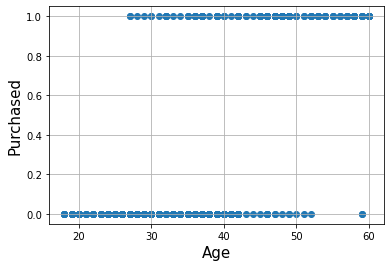

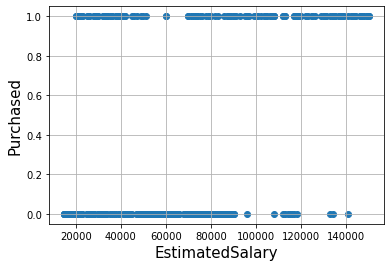

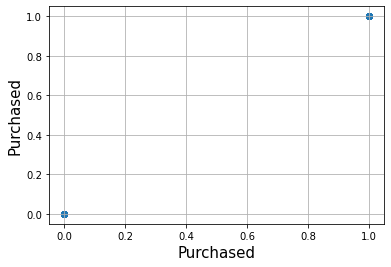

In [13]:
x_axis = ["Age", "EstimatedSalary","Purchased"]
y_axis = "Purchased"
for col in x_axis:
    scatter(x=col,y=y_axis,in_data=df)

# lets check for Bivariate Analysis

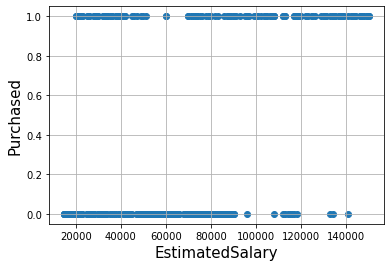

In [14]:
plt.scatter(df["EstimatedSalary"],df["Purchased"])
plt.xlabel("EstimatedSalary", fontsize=15)
plt.ylabel("Purchased", fontsize=15)
plt.grid()

(array([257.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 143.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

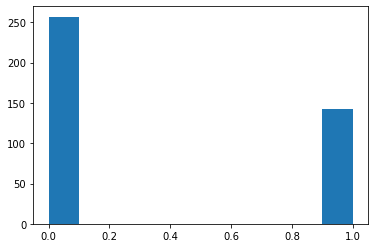

In [15]:
plt.hist(df["Purchased"])

# T-Test to check for mean difference 2 groups is significant or not?
null hyphosis = no difference between groups(u1 = u2).       
Alternate hyphosis = difference between groups(u1 != u2).   
we can check it by scatter plot or doing t-test.   

In [16]:
import scipy.stats as stats

In [17]:
#t-test check the variance between 2 groups means.
fvalue, pvalue = stats.ttest_ind(df[df["Purchased"]==1]["EstimatedSalary"],
                                df[df["Purchased"]==0]["EstimatedSalary"])
                    

In [18]:
fvalue, pvalue

(7.7493599219079, 7.772785450066969e-14)

In [19]:
if (pvalue<=0.5):
    print("null hyphothesis Rejected : no relation (u1 != u2)")
else:
    print("null hyphothesis accepted :  relation (u1 = u2)")
    


null hyphothesis Rejected : no relation (u1 != u2)


In [20]:
#defining the ttest
df[df["Purchased"]==1]

,Gender,Age,EstimatedSalary,Purchased
7,Female,32,150000,1
16,Male,47,25000,1
17,Male,45,26000,1
18,Male,46,28000,1
19,Female,48,29000,1
...,...,...,...,...
393,Male,60,42000,1
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1


In [21]:
# it will show index and estimate salary of purchased ==1
df[df["Purchased"]==1]["EstimatedSalary"]

7      150000
16      25000
17      26000
18      28000
19      29000
        ...  
393     42000
395     41000
396     23000
397     20000
399     36000
Name: EstimatedSalary, Length: 143, dtype: int64

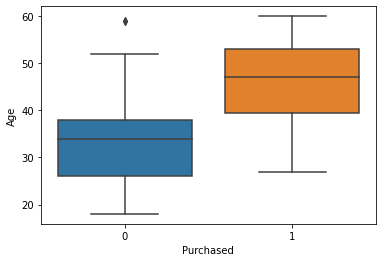

In [22]:
sns.boxplot(x="Purchased",y="Age",data=df)

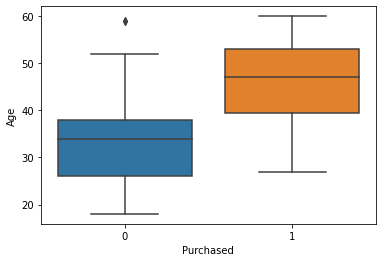

In [23]:
sns.boxplot(y=df["Age"],x=df["Purchased"])

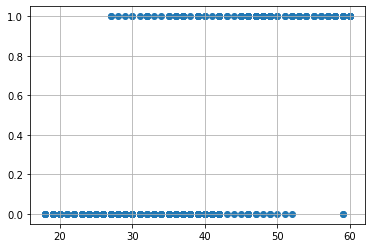

In [24]:
plt.scatter(y=df["Purchased"],x=df["Age"])
plt.grid()

Insights  :  As per above boxplot and scatterplot .
             we can say there is no relation between age.
             can be crosscheck by t-test.

# Multivariate Analysis  


Text(120000, 32, 'Q4')

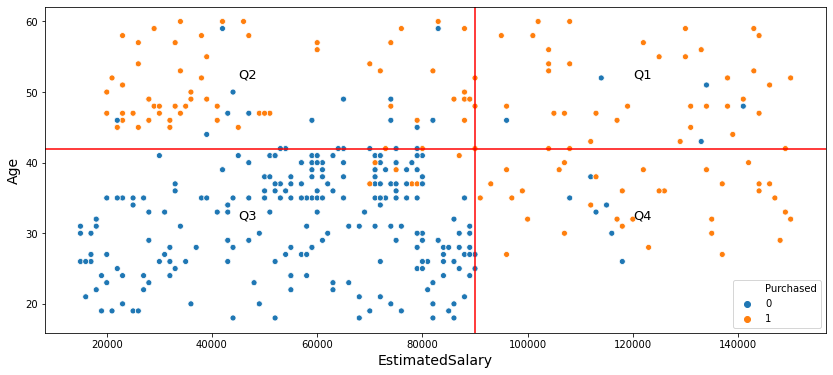

In [25]:
#sns.scatterplot(x=df["EstimatedSalary"],y=df["Age"],hue=df["Purchased"])
#another Way
plt.figure(figsize=(14,6))
sns.scatterplot(x="EstimatedSalary",y="Age",hue="Purchased",data=df)
plt.xlabel("EstimatedSalary", fontsize=14)
plt.ylabel("Age",fontsize=14)
plt.axhline(y=42,color="red")
plt.axvline(x=90000,color="red")
plt.text(120000,52,"Q1",fontsize=13, color="Black")
plt.text(45000,52,"Q2",fontsize=13, color="Black")
plt.text(45000,32,"Q3",fontsize=13, color="Black")
plt.text(120000,32,"Q4",fontsize=13, color="Black")

Insights :          
           looks like this shopping is not for Q3 people.      
           Company should try to lanuch new cheap products for Q3.     
           Try to offer a new service to ongoing customer.         
           Promotion plans and advertisments idea.     


In [26]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [27]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

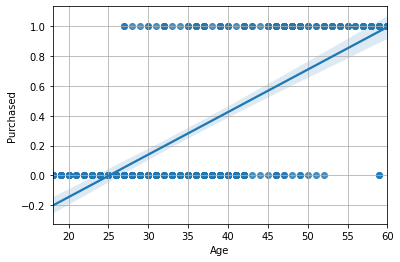

In [28]:
sns.regplot(x=df["Age"],y=df["Purchased"])
plt.grid()

# insights : 
 <font color=green>by seeing this regplot we can say here we can not use linear regression.</font><br>    
 this regression line does not seem to good fit to my model.<br>
 at age=20 it purchased in -ve which is not possbile.   

# <font color=red>2 package are used in logistic regression</font><br>
1. Stats Model
2. Sklearn

In [29]:
from sklearn.linear_model import LogisticRegression

# <font color=blue>Model : 1  Logistic Regression using Age </font><br>

In [30]:
X=df[["Age"]]
y=df[["Purchased"]]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=100)

In [33]:

logreg = LogisticRegression(C = 1000)
# C means add a penality to errors
# Higher value means low penality (bydefault=1)
# you can crosschek by reducing the C
logreg = logreg.fit(X_train,y_train)

In [34]:
m = logreg.coef_
c = logreg.intercept_
m,c

(array([[0.19487776]]), array([-8.29469811]))

In [35]:
m = logreg.coef_
c = logreg.intercept_
m,c

(array([[0.19487776]]), array([-8.29469811]))

# <font color=red> derive Logistic Regression Equation </font><br>

In [36]:
X_train.head(2)

,Age
190,24
46,25


In [37]:
age = 24
#y= age*m + c   #y=mx+c
y = (logreg.coef_[0]*age+logreg.intercept_[0])[0]
#[0] use to out from the array
y

-3.6176318577187327

In [38]:
e=2.71828
e**y / (1+e**y)   # probability = e**y/1+e**y


0.026144364234747818

# <font color=green> Lets check model Probability </font><br>

In [39]:
logreg.predict_proba(X_train)
# it will show the all probability either we purchase or not

array([[0.9738557 , 0.0261443 ],
       [0.96840814, 0.03159186],
       [0.9738557 , 0.0261443 ],
       [0.52743047, 0.47256953],
       [0.74729193, 0.25270807],
       [0.841423  , 0.158577  ],
       [0.9852589 , 0.0147411 ],
       [0.98996927, 0.01003073],
       [0.98783729, 0.01216271],
       [0.29638821, 0.70361179],
       [0.70875462, 0.29124538],
       [0.66695955, 0.33304045],
       [0.19012627, 0.80987373],
       [0.78229632, 0.21770368],
       [0.29638821, 0.70361179],
       [0.52743047, 0.47256953],
       [0.66695955, 0.33304045],
       [0.66695955, 0.33304045],
       [0.98214381, 0.01785619],
       [0.95404283, 0.04595717],
       [0.81366104, 0.18633896],
       [0.52743047, 0.47256953],
       [0.81366104, 0.18633896],
       [0.81366104, 0.18633896],
       [0.22195458, 0.77804542],
       [0.95404283, 0.04595717],
       [0.38348052, 0.61651948],
       [0.25741756, 0.74258244],
       [0.22195458, 0.77804542],
       [0.93359331, 0.06640669],
       [0.

In [40]:
y_train_prob = logreg.predict_proba(X_train)[:,1] # 0 : not occurance and 1: occurance probability
# this will give only purchase probability
y_train_prob

array([0.0261443 , 0.03159186, 0.0261443 , 0.47256953, 0.25270807,
       0.158577  , 0.0147411 , 0.01003073, 0.01216271, 0.70361179,
       0.29124538, 0.33304045, 0.80987373, 0.21770368, 0.70361179,
       0.47256953, 0.33304045, 0.33304045, 0.01785619, 0.04595717,
       0.18633896, 0.47256953, 0.18633896, 0.18633896, 0.77804542,
       0.04595717, 0.61651948, 0.74258244, 0.77804542, 0.06640669,
       0.88430281, 0.04595717, 0.09504906, 0.07955817, 0.56952743,
       0.07955817, 0.06640669, 0.95294374, 0.04595717, 0.95294374,
       0.29124538, 0.02161513, 0.158577  , 0.04595717, 0.47256953,
       0.1131853 , 0.77804542, 0.21770368, 0.1131853 , 0.03813006,
       0.18633896, 0.94339214, 0.25270807, 0.07955817, 0.77804542,
       0.18633896, 0.18633896, 0.25270807, 0.04595717, 0.80987373,
       0.74258244, 0.03813006, 0.66143125, 0.03813006, 0.66143125,
       0.21770368, 0.0261443 , 0.25270807, 0.88430281, 0.77804542,
       0.42440651, 0.13426865, 0.77804542, 0.96095038, 0.01003

# Logistic Regression : Output should be in the form of 0 or 1.<br>
based on the probability predict method converted it into o and 1 form.<br>
by default threshold id 0.5.

In [41]:
y_train_pred = logreg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [42]:
X_train_op = X_train.copy()
X_train_op["y_train_actuals"] = y_train["Purchased"]
X_train_op["y_train_prob"] = y_train_prob
X_train_op["y_train_pred"] = y_train_pred

In [43]:
X_train_op

,Age,y_train_actuals,y_train_prob,y_train_pred
190,24,0,0.026144,0
46,25,0,0.031592,0
50,24,0,0.026144,0
377,42,0,0.472570,0
121,37,0,0.252708,0
...,...,...,...,...
343,47,1,0.703612,1
359,42,0,0.472570,0
323,48,1,0.742582,1
280,59,1,0.960950,1


Text(0.5, 1.0, 'Train data Vs Best filt line by Logistic Regression')

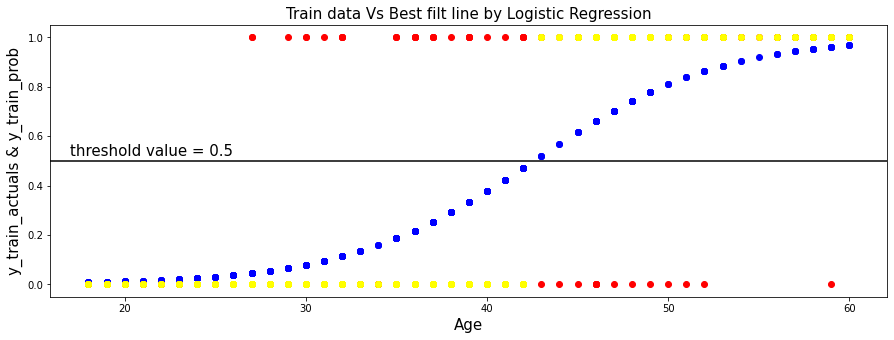

In [44]:
plt.figure(figsize=(15,5))
plt.scatter(X_train_op["Age"],X_train_op["y_train_prob"], color="blue")
plt.scatter(X_train_op["Age"],X_train_op["y_train_actuals"], color="red")
plt.scatter(X_train_op["Age"],X_train_op["y_train_pred"], color="yellow")
plt.axhline(0.5,color="Black")
plt.text(17,0.52,"threshold value = 0.5", fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("y_train_actuals & y_train_prob", fontsize=15)
plt.title("Train data Vs Best filt line by Logistic Regression", fontsize=15)

# <font color=green> Error Evluation </font><br>

In [45]:
X_train_op["y_train_actuals"].value_counts()

0    208
1    112
Name: y_train_actuals, dtype: int64

In [46]:
X_train_op["y_train_pred"].value_counts()

0    228
1     92
Name: y_train_pred, dtype: int64

# <font color=green> Confusion Matrix </font><br>

In [47]:
# True Negative
X_train_op.loc[X_train_op["y_train_actuals"]==0].loc[X_train_op["y_train_pred"]==0].count()

Age                193
y_train_actuals    193
y_train_prob       193
y_train_pred       193
dtype: int64

In [48]:
# False Positive
X_train_op.loc[X_train_op["y_train_actuals"]==0].loc[X_train_op["y_train_pred"]==1].count()

Age                15
y_train_actuals    15
y_train_prob       15
y_train_pred       15
dtype: int64

In [49]:
# True Negative
X_train_op.loc[X_train_op["y_train_actuals"]==1].loc[X_train_op["y_train_pred"]==0].count()

Age                35
y_train_actuals    35
y_train_prob       35
y_train_pred       35
dtype: int64

In [50]:
# True Positive
X_train_op.loc[X_train_op["y_train_actuals"]==1].loc[X_train_op["y_train_pred"]==1].count()

Age                77
y_train_actuals    77
y_train_prob       77
y_train_pred       77
dtype: int64

In [51]:
# 2nd way
X_train_op["Count"] = np.where((X_train_op["y_train_actuals"]==1)&(X_train_op["y_train_pred"]==1),True,False)
X_train_op["Count"].value_counts()

False    243
True      77
Name: Count, dtype: int64

In [52]:
# 2nd way
X_train_op["Count"] = np.where((X_train_op["y_train_actuals"]==0)&(X_train_op["y_train_pred"]==0),True,False)
X_train_op["Count"].value_counts()

True     193
False    127
Name: Count, dtype: int64

In [53]:
# Direct Way
from sklearn.metrics import confusion_matrix

In [54]:
cnf_matrix = confusion_matrix(X_train_op["y_train_actuals"],X_train_op["y_train_pred"])
cnf_matrix

array([[193,  15],
       [ 35,  77]], dtype=int64)

Text(0.5, 1.0, 'confusion_matrix')

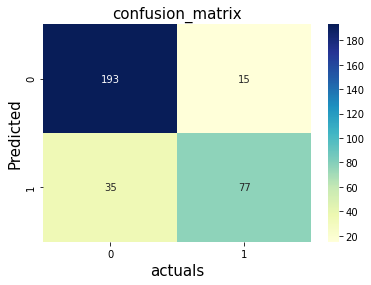

In [55]:
# Heat map
sns.heatmap(cnf_matrix, annot=True,cmap="YlGnBu",fmt='.3g')
plt.xlabel("actuals", fontsize=15)
plt.ylabel("Predicted", fontsize=15)
plt.title("confusion_matrix", fontsize=15)

In [56]:
# Accuarcy train data

(193+77)/(193+15+35+77)


0.84375

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
# Accuracy using Package
accuracy_score(X_train_op["y_train_actuals"],X_train_op["y_train_pred"])

0.84375

In [59]:
#precision for 0
precision_0 = 193/(193+35)
precision_0
#precision for 1
precision_1 = 77/(77+15)
precision_0, precision_1

(0.8464912280701754, 0.8369565217391305)

# Lets Predict on Test Data

In [60]:
# Probability 

logreg.predict_proba(X_test)

array([[0.57559349, 0.42440651],
       [0.38348052, 0.61651948],
       [0.841423  , 0.158577  ],
       [0.74729193, 0.25270807],
       [0.86573135, 0.13426865],
       [0.33856875, 0.66143125],
       [0.57559349, 0.42440651],
       [0.74729193, 0.25270807],
       [0.57559349, 0.42440651],
       [0.93359331, 0.06640669],
       [0.66695955, 0.33304045],
       [0.52743047, 0.47256953],
       [0.70875462, 0.29124538],
       [0.86573135, 0.13426865],
       [0.03235905, 0.96764095],
       [0.13717606, 0.86282394],
       [0.62236243, 0.37763757],
       [0.66695955, 0.33304045],
       [0.81366104, 0.18633896],
       [0.92044183, 0.07955817],
       [0.66695955, 0.33304045],
       [0.94470137, 0.05529863],
       [0.94470137, 0.05529863],
       [0.98996927, 0.01003073],
       [0.03235905, 0.96764095],
       [0.78229632, 0.21770368],
       [0.96186994, 0.03813006],
       [0.05660786, 0.94339214],
       [0.97838487, 0.02161513],
       [0.38348052, 0.61651948],
       [0.

In [61]:
y_test_prob = logreg.predict_proba(X_test)[:,1] # 0 : not occurance and 1: occurance probability
# this will give only purchase probability
y_test_prob

array([0.42440651, 0.61651948, 0.158577  , 0.25270807, 0.13426865,
       0.66143125, 0.42440651, 0.25270807, 0.42440651, 0.06640669,
       0.33304045, 0.47256953, 0.29124538, 0.13426865, 0.96764095,
       0.86282394, 0.37763757, 0.33304045, 0.18633896, 0.07955817,
       0.33304045, 0.05529863, 0.05529863, 0.01003073, 0.96764095,
       0.21770368, 0.03813006, 0.94339214, 0.02161513, 0.61651948,
       0.18633896, 0.80987373, 0.66143125, 0.77804542, 0.91860772,
       0.96095038, 0.1131853 , 0.18633896, 0.03813006, 0.37763757,
       0.01216271, 0.04595717, 0.158577  , 0.90279742, 0.95294374,
       0.06640669, 0.37763757, 0.05529863, 0.25270807, 0.91860772,
       0.05529863, 0.33304045, 0.37763757, 0.18633896, 0.74258244,
       0.33304045, 0.90279742, 0.70361179, 0.42440651, 0.96764095,
       0.18633896, 0.70361179, 0.33304045, 0.158577  , 0.03813006,
       0.37763757, 0.70361179, 0.42440651, 0.0261443 , 0.25270807,
       0.13426865, 0.74258244, 0.96095038, 0.01216271, 0.04595

In [62]:
y_test_pred = logreg.predict(X_test)
y_test_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
X_test_op = X_test.copy()
X_test_op["y_test_actuals"] = y_test["Purchased"]
X_test_op["y_test_prob"] = y_test_prob
X_test_op["y_test_pred"] = y_test_pred
X_test_op

,Age,y_test_actuals,y_test_prob,y_test_pred
248,41,0,0.424407,0
318,45,1,0.616519,1
173,34,0,0.158577,0
285,37,1,0.252708,0
184,33,0,0.134269,0
...,...,...,...,...
358,40,1,0.377638,0
166,22,0,0.017856,0
198,26,0,0.038130,0
267,37,0,0.252708,0


Text(0.5, 1.0, 'Test data Vs Best filt line by Logistic Regression')

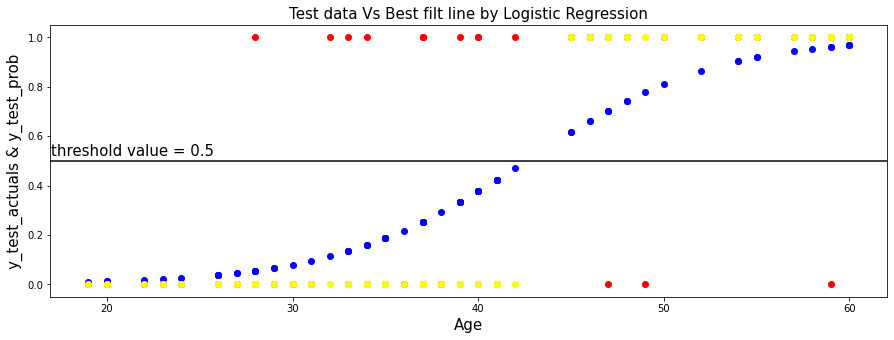

In [64]:
plt.figure(figsize=(15,5))
plt.scatter(X_test_op["Age"],X_test_op["y_test_prob"], color="blue")
plt.scatter(X_test_op["Age"],X_test_op["y_test_actuals"], color="red")
plt.scatter(X_test_op["Age"],X_test_op["y_test_pred"], color="yellow")
plt.axhline(0.5,color="Black")
plt.text(17,0.52,"threshold value = 0.5", fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("y_test_actuals & y_test_prob", fontsize=15)
plt.title("Test data Vs Best filt line by Logistic Regression", fontsize=15)

In [65]:
accuracy_score(X_test_op["y_test_actuals"],X_test_op["y_test_pred"])

0.825

# <font color=green> Model : 2 </font> - Using 2 variable Age & Estimated Salary <br>

In [66]:
X = df[["Age", "EstimatedSalary"]]
y = df[["Purchased"]]

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=100)

In [68]:
logreg = LogisticRegression(C = 1000)
# C means add a penality to errors
# Higher value means low penality (bydefault=1)
# you can crosschek by reducing the C
logreg = logreg.fit(X_train,y_train)

In [69]:
m = logreg.coef_
c = logreg.intercept_

In [70]:
m, c

(array([[-3.31088549e-09, -2.89780544e-06]]), array([-4.21824581e-10]))

In [71]:
logreg.predict_proba(X_train)

array([[0.56055523, 0.43944477],
       [0.55698303, 0.44301697],
       [0.52316587, 0.47683413],
       [0.53832066, 0.46167934],
       [0.55197213, 0.44802787],
       [0.53111119, 0.46888881],
       [0.54910392, 0.45089608],
       [0.51882685, 0.48117315],
       [0.52605664, 0.47394336],
       [0.5217199 , 0.4782801 ],
       [0.54263885, 0.45736115],
       [0.55555249, 0.44444751],
       [0.52605666, 0.47394334],
       [0.53904077, 0.46095923],
       [0.57548595, 0.42451405],
       [0.54623248, 0.45376752],
       [0.56910229, 0.43089771],
       [0.5512554 , 0.4487446 ],
       [0.55841264, 0.44158736],
       [0.56055523, 0.43944477],
       [0.5275014 , 0.4724986 ],
       [0.55769797, 0.44230203],
       [0.54191957, 0.45808043],
       [0.55197213, 0.44802787],
       [0.52822361, 0.47177639],
       [0.54120012, 0.45879988],
       [0.51593257, 0.48406743],
       [0.52099677, 0.47900323],
       [0.5619824 , 0.4380176 ],
       [0.55769796, 0.44230204],
       [0.

In [72]:
y_train_prob = logreg.predict_proba(X_train)[:,1] # 0 : not occurance and 1: occurance probability
# this will give only purchase probability
y_train_prob

array([0.43944477, 0.44301697, 0.47683413, 0.46167934, 0.44802787,
       0.46888881, 0.45089608, 0.48117315, 0.47394336, 0.4782801 ,
       0.45736115, 0.44444751, 0.47394334, 0.46095923, 0.42451405,
       0.45376752, 0.43089771, 0.4487446 , 0.44158736, 0.43944477,
       0.4724986 , 0.44230203, 0.45808043, 0.44802787, 0.47177639,
       0.45879988, 0.48406743, 0.47900323, 0.4380176 , 0.44230204,
       0.42522213, 0.485515  , 0.44516314, 0.45520442, 0.40064097,
       0.44230204, 0.44587899, 0.47249858, 0.40203347, 0.42734824,
       0.41956622, 0.48551501, 0.41745061, 0.46095924, 0.42239164,
       0.42805757, 0.47394334, 0.44587898, 0.41604188, 0.44158736,
       0.43018724, 0.41252607, 0.45879987, 0.43730443, 0.47972644,
       0.48406744, 0.48044976, 0.44587898, 0.47755708, 0.46816721,
       0.44659505, 0.44230204, 0.48406743, 0.48913492, 0.44659505,
       0.45664206, 0.45808044, 0.44444751, 0.47538852, 0.43587881,
       0.4782801 , 0.46312005, 0.47972644, 0.39786082, 0.48479

In [73]:
y_train_pred = logreg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [74]:
X_train_op = X_train.copy()
X_train_op["y_train_actuals"] = y_train["Purchased"]
X_train_op["y_train_prob"] = y_train_prob
X_train_op["y_train_pred"] = y_train_pred
X_train_op

,Age,EstimatedSalary,y_train_actuals,y_train_prob,y_train_pred
190,24,84000,0,0.439445,0
46,25,79000,0,0.443017,0
50,24,32000,0,0.476834,0
377,42,53000,0,0.461679,0
121,37,72000,0,0.448028,0
...,...,...,...,...,...
343,47,51000,1,0.463120,0
359,42,54000,0,0.460959,0
323,48,30000,1,0.478280,0
280,59,88000,1,0.436591,0


In [75]:
X_train_op["y_train_actuals"].value_counts()

0    208
1    112
Name: y_train_actuals, dtype: int64

In [76]:
X_train_op["y_train_pred"].value_counts()

0    320
Name: y_train_pred, dtype: int64

In [77]:
cnf_matrix = confusion_matrix(X_train_op["y_train_actuals"],X_train_op["y_train_pred"])
cnf_matrix

array([[208,   0],
       [112,   0]], dtype=int64)

Insights : <br>
Actuals - 0 : 208 and 1 : 112 <br>
Predicted - 0 : 0 and 1: 0 <br>
<font color = "Brown">In this Secnario the predicted value is not reliable.<br>

# <font color = "red"> All value Predicted are 0.. why?

In [78]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [79]:
df["Age"].mean()

37.655

# <font color = "Yellow"> Model : 3  <font color = "green">Standardize the Model<br>
    bacause the input variable Age and EstimatedSalary have different units.

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
X = df[["Age", "EstimatedSalary"]]
y = df[["Purchased"]]

In [82]:
sc = StandardScaler()
X = sc.fit_transform(X)

X = pd.DataFrame(X, columns=["Age","EstimatedSalary"])

In [83]:
X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=100)
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
logreg.coef_, logreg.intercept_

(array([[2.25824354, 1.07540363]]), array([-1.11944669]))

In [85]:
y_train_prob = logreg.predict_proba(X_train)[:,1] 
y_train_prob

array([0.02622464, 0.02774171, 0.005186  , 0.32938278, 0.23335998,
       0.05995666, 0.00843561, 0.00146486, 0.00248984, 0.41124109,
       0.20032391, 0.35430802, 0.61720769, 0.12200805, 0.88180065,
       0.41008641, 0.49996161, 0.31224804, 0.015664  , 0.0489203 ,
       0.06329824, 0.53535515, 0.11275279, 0.16509196, 0.58825549,
       0.02145644, 0.26059978, 0.45642971, 0.86306395, 0.06523264,
       0.96346149, 0.00676997, 0.08648962, 0.04674972, 0.91954686,
       0.07968418, 0.05624056, 0.90605636, 0.21522477, 0.98601778,
       0.57185406, 0.0028681 , 0.38258024, 0.01955496, 0.73611463,
       0.20041853, 0.56513306, 0.21242162, 0.30009692, 0.03633948,
       0.30336136, 0.99101663, 0.15934345, 0.09747571, 0.50234712,
       0.03917428, 0.04556945, 0.25073466, 0.00955494, 0.67488111,
       0.77666461, 0.03524966, 0.30424556, 0.00466936, 0.69316335,
       0.14380057, 0.01170995, 0.2627857 , 0.74300203, 0.87388031,
       0.16070544, 0.06207287, 0.50234712, 0.99697526, 0.00125

In [86]:
y_train_pred = logreg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [87]:
X_train_op = X_train.copy()
X_train_op["y_train_actuals"] = y_train["Purchased"]
X_train_op["y_train_prob"] = y_train_prob
X_train_op["y_train_pred"] = y_train_pred

# by default threshold is 0.5 but we can change it
#X_train_op["y_train_pred"] = np.where(X_train_op["y_train_prob"]>0.5,1,0)
X_train_op.tail()

,Age,EstimatedSalary,y_train_actuals,y_train_prob,y_train_pred
343,0.892570,-0.550371,1,0.575499,1
359,0.415005,-0.462276,0,0.336395,0
323,0.988083,-1.167033,1,0.464275,0
280,2.038728,0.536129,1,0.983061,1
8,-1.208719,-1.078938,0,0.006631,0


In [88]:
cnf_matrix = confusion_matrix(X_train_op["y_train_actuals"],X_train_op["y_train_pred"])
cnf_matrix

array([[192,  16],
       [ 31,  81]], dtype=int64)

In [89]:
accuracy_score(X_train_op["y_train_actuals"],X_train_op["y_train_pred"])

0.853125

Text(0.5, 1.0, 'scatter plot with purchase details')

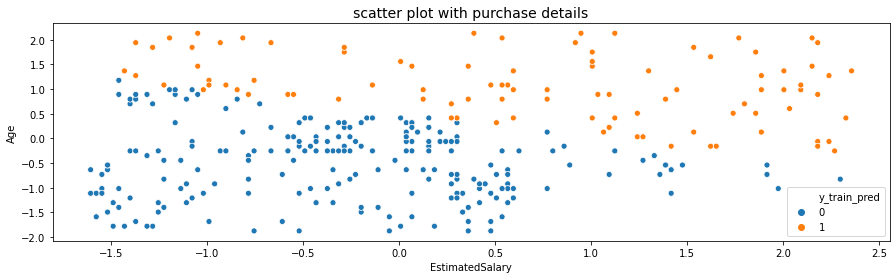

In [90]:
plt.figure(figsize=(15,4))
sns.scatterplot(X_train_op["EstimatedSalary"],X_train_op["Age"], hue=X_train_op["y_train_pred"] ,color="blue")
plt.title("scatter plot with purchase details", fontsize=14)

Text(0.5, 1.0, 'scatter plot with purchase details')

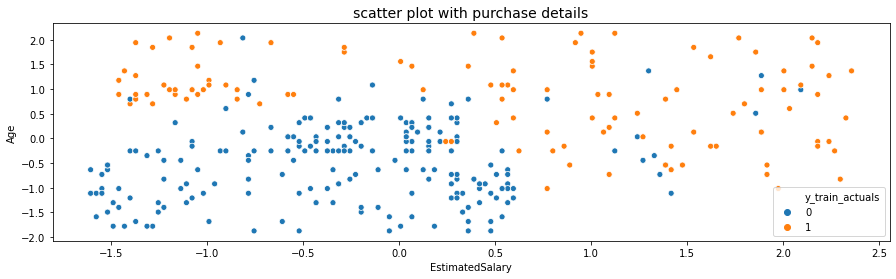

In [91]:
plt.figure(figsize=(15,4))
sns.scatterplot(X_train_op["EstimatedSalary"],X_train_op["Age"], hue=X_train_op["y_train_actuals"])
plt.title("scatter plot with purchase details", fontsize=14)

In [92]:
B1 = logreg.coef_[0][0]
B2 = logreg.coef_[0][1]
B0 = logreg.intercept_[0]
B1, B2, B0

(2.258243538774428, 1.0754036321348848, -1.1194466850232756)

# <font color = "Red">  Creating a Decision Boundary
    y = B0 + X1B1 + X2B2
    assume y to 0 formula Becomes : 
         X2       = -(B0 + X1B1) / B2
  EstimatedSalary = -(intercept + Coefficient * Age) / Co


In [93]:
X_train_op_1 = X_train_op.copy()

In [94]:
X_train_op_1["Boundary"] = -(B0+B1*X_train_op_1["Age"]) / B2

(-2.0, 2.5)

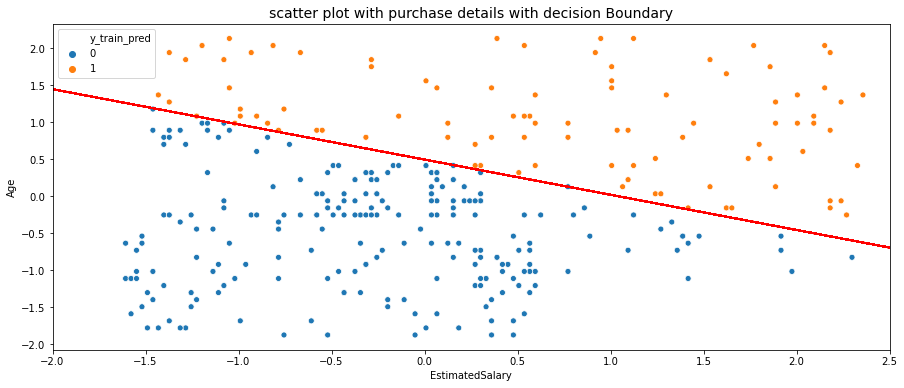

In [95]:
plt.figure(figsize=(15,6))
sns.scatterplot(X_train_op["EstimatedSalary"],X_train_op["Age"], hue=X_train_op["y_train_pred"])
plt.plot(X_train_op_1["Boundary"],X_train_op["Age"],color="red")
plt.title("scatter plot with purchase details with decision Boundary", fontsize=14)
plt.xlim(-2,2.5)

Text(0.5, 1.0, 'Train data Vs Best filt line by Logistic Regression')

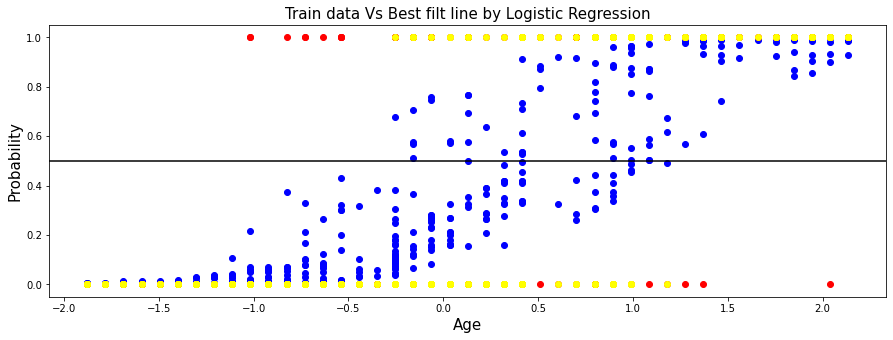

In [96]:
plt.figure(figsize=(15,5))
plt.scatter(X_train_op["Age"],X_train_op["y_train_prob"], color="blue")
plt.scatter(X_train_op["Age"],X_train_op["y_train_actuals"], color="red")
plt.scatter(X_train_op["Age"],X_train_op["y_train_pred"], color="yellow")
plt.axhline(0.5,color="Black")
plt.xlabel("Age",fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.title("Train data Vs Best filt line by Logistic Regression", fontsize=15)

# Insights :
Red color : Error Point <br>
Blue Color = Original Value<br>
Yellow Color = Predicted Value

# <font color = "Green"> For test data

In [97]:
accuracy_score(X_test_op["y_test_actuals"],X_test_op["y_test_pred"])

0.825

# <font color = "green">  Now check for 3rd columns "Gender" needs to add or not?

In [98]:
df_2 = df.copy()

In [99]:
df_2.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [100]:
df_2.groupby("Gender")["Purchased"].value_counts()

Gender  Purchased
Female  0            127
        1             77
Male    0            130
        1             66
Name: Purchased, dtype: int64

In [101]:
table = pd.pivot_table(df_2, columns = "Purchased", index = "Gender", values = "Age", aggfunc = "count" )
table

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


<font color = "green"> Chi-Square : To check dependences of 2 categorical columns.     
    Null Hypothesis : output variable is dependent on input varable (gender is dependent on purchase)<br>
    Alternate Hypothesis : output variable is independent on input varable (gender is independent on purchase)

In [102]:
from scipy.stats import chi2_contingency
chi2_contingency(table)
# output as : (t-statistic, P-value, degree of freedom, array is expected table) 

(0.5550869364098915,
 0.45624659183130645,
 1,
 array([[131.07,  72.93],
        [125.93,  70.07]]))

In [103]:
tstatistic, Pvalue, dof, expected_table = chi2_contingency(table)
#if pvalue < 0.05:
#    print("Dependent(Reject H0)")
#else:
#    print("Independent(fail to reject H0)")

<font color = "green"> pvalue is >0.05 than Purchase is not dependent on gender : gender does not make any significant difference in predictions 

# <font color = "brown"> Model - 4 :  Logistic Regression using Age & Estimated Salary(Standardize) and Gender

In [104]:
df["Gender_dummy"] = pd.get_dummies(df["Gender"], drop_first = True)
df

,Gender,Age,EstimatedSalary,Purchased,Gender_dummy
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1
...,...,...,...,...,...
395,Female,46,41000,1,0
396,Male,51,23000,1,1
397,Female,50,20000,1,0
398,Male,36,33000,0,1


In [105]:
# gender already Categorical and now we standardize age and estimatedsalary.
X = df[["Age", "EstimatedSalary"]]
y = df[["Purchased"]]

sc = StandardScaler()
X = sc.fit_transform(X)

X = pd.DataFrame(X, columns=["Age","EstimatedSalary"])

#add gender dummy column
X["Gender_dummy"] = df["Gender_dummy"]
X.head()

,Age,EstimatedSalary,Gender_dummy
0,-1.781797,-1.490046,1
1,-0.253587,-1.460681,1
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,1


In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=100)
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
logreg.coef_, logreg.intercept_

(array([[2.28581938, 1.08303239, 0.27232788]]), array([-1.2661054]))

In [107]:
#probability and predictions
y_train_prob = logreg.predict_proba(X_train)[:,1] 
y_train_pred = logreg.predict(X_train)

In [108]:
X_train_op = X_train.copy()
X_train_op["y_train_actuals"] = y_train["Purchased"]
X_train_op["y_train_prob"] = y_train_prob
X_train_op["y_train_pred"] = y_train_pred

# by default threshold is 0.5 but we can change it
#X_train_op["y_train_pred"] = np.where(X_train_op["y_train_prob"]>0.5,1,0)
X_train_op.tail()

,Age,EstimatedSalary,Gender_dummy,y_train_actuals,y_train_prob,y_train_pred
343,0.892570,-0.550371,0,1,0.544403,1
359,0.415005,-0.462276,1,0,0.366837,0
323,0.988083,-1.167033,0,1,0.432549,0
280,2.038728,0.536129,0,1,0.981561,1
8,-1.208719,-1.078938,1,0,0.007209,0


In [109]:
accuracy_score(X_train_op["y_train_actuals"],X_train_op["y_train_pred"])

0.859375

<font color = "green">Insights :    
There is no difference on accuracy after adding gender in the model.<br>
For 2 variable on train data accuracy : 0.8531

# <font color = "Brown"> Model-5  Using KNN Classifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
X = df[["Age","EstimatedSalary"]]
y = df[["Purchased"]]

In [112]:
sc = StandardScaler()
X = sc.fit_transform(X)

X = pd.DataFrame(X, columns=["Age","EstimatedSalary"])
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=100)

knn = KNeighborsClassifier(n_neighbors = 3 , metric = "euclidean")
knn = knn.fit(X_train,y_train)


In [113]:
y_train_prob = knn.predict_proba(X_train)[:,1] 
y_train_pred = knn.predict(X_train)

In [114]:
accuracy_score(X_train_op["y_train_actuals"],X_train_op["y_train_pred"])

0.859375

# <font color = "Brown"> Doing withput scaling

In [115]:
X = df[["Age","EstimatedSalary"]]
y = df[["Purchased"]]

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=100)

knn = KNeighborsClassifier(n_neighbors =3, metric = "euclidean") 
# here we can change n_neighbors, change accuracy, 3 is best for the model.
knn = knn.fit(X_train,y_train)

In [117]:
y_train_prob = knn.predict_proba(X_train)[:,1] 
y_train_pred = knn.predict(X_train)
knn.score(X_train,y_train)

0.896875

In [118]:
X_train_op = X_train.copy()
X_train_op["y_train_actuals"] = y_train["Purchased"]
X_train_op["y_train_prob"] = y_train_prob
X_train_op["y_train_pred"] = y_train_pred
X_train_op.head()

,Age,EstimatedSalary,y_train_actuals,y_train_prob,y_train_pred
190,24,84000,0,0.000000,0
46,25,79000,0,0.000000,0
50,24,32000,0,0.333333,0
377,42,53000,0,0.000000,0
121,37,72000,0,0.000000,0


Text(0.5, 1.0, 'scatter plot with purchase details')

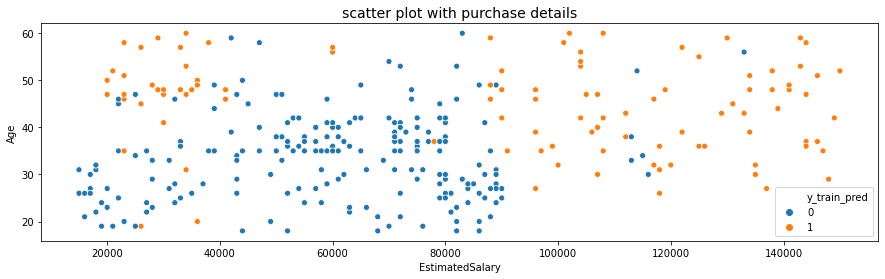

In [119]:
plt.figure(figsize=(15,4))
sns.scatterplot(X_train_op["EstimatedSalary"],X_train_op["Age"], hue=X_train_op["y_train_pred"])
plt.title("scatter plot with purchase details", fontsize=14)

Text(0.5, 1.0, 'ConfusionMatrix')

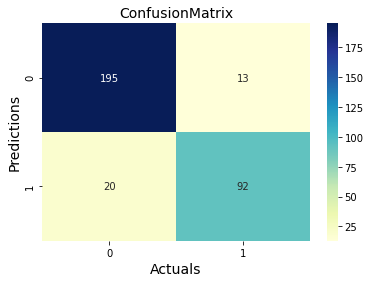

In [120]:
cnf_matrix = confusion_matrix(X_train_op["y_train_actuals"],X_train_op["y_train_pred"])

sns.heatmap(cnf_matrix, annot=True, cmap ="YlGnBu", fmt='.3g')
plt.xlabel("Actuals",fontsize=14)
plt.ylabel("Predictions",fontsize=14)
plt.title("ConfusionMatrix", fontsize=14)


In [121]:
#from matplotlib.colors import ListedColormap
#from sklearn import neighbors
#h = 0.2

In [122]:
#X_1 = X_train.to_numpy()
#y_1 = y_train["Purchased"].to_numpy()

#X_min,X_max = X_1[:,0].min() - 1, X_1[:,0].max() + 1
#y_min,y_max = X_1[:,1].min() - 1, X_1[:,1].max() + 1
#XX, yy = np.meshgrid(np.arange(X_min,X_max,h),np.arange(y_min,y_max,h))

In [123]:
# Predict class using data and knn classifier
#Z = knn.predict(np.c_[XX.ravel(), yy.ravel()])

In [124]:
#Creates colormap
#cmap_light = ListedColormap(['#FFAAAA','#AAFFAA'])
#cmap_bold = ListedColormap(['#FF0000','#00FF00'])

In [125]:
# put the result into a color plot
#Z = Z.reshape(XX.shape)
#plt.figure()
#plt.pcolormesh(XX, yy, Z, cmap=cmap_light)

#plot also the training points
#plt.scatter(X_1[:,0], X_1[:,1], c=y_1, cmap=cmap_bold)
#plt.xlim(XX.min(), XX.max())
#plt.ylim(yy.min(), yy.max())
#plt.title("2-Class Classification (K= %i)" % (3))

# <font color = "Red"> above 5 input code is not running 

# <font color = "green"> Model - 5 : Decision Tree Classifier

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
X = df[["Age","EstimatedSalary"]]
y = df[["Purchased"]]

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=100)
# use the below and check accuracy, it overfitting the data
#DTC = DecisionTreeClassifier()
DTC = DecisionTreeClassifier(max_depth=2) 
# here we can change max_depth, change accuracy, 2 is best for this model.
DTC = DTC.fit(X_train,y_train)

In [129]:
y_train_prob = DTC.predict_proba(X_train)[:,1] 
y_train_pred = DTC.predict(X_train)
DTC.score(X_train,y_train)

0.915625

In [130]:
DTC.score(X_test,y_test)

0.9125

In [131]:
X_train_op = X_train.copy()
X_train_op["y_train_actuals"] = y_train["Purchased"]
X_train_op["y_train_pred"] = y_train_pred
X_train_op.head()

,Age,EstimatedSalary,y_train_actuals,y_train_pred
190,24,84000,0,0
46,25,79000,0,0
50,24,32000,0,0
377,42,53000,0,0
121,37,72000,0,0


In [132]:
accuracy_score(X_train_op["y_train_actuals"],X_train_op["y_train_pred"])

0.915625

In [133]:
accuracy_score(y_test, DTC.predict(X_test))

0.9125

Text(0.5, 1.0, 'ConfusionMatrix')

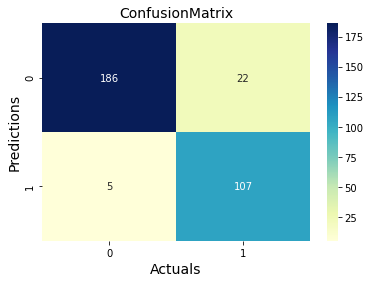

In [134]:
cnf_matrix = confusion_matrix(X_train_op["y_train_actuals"],X_train_op["y_train_pred"])

sns.heatmap(cnf_matrix, annot=True, cmap ="YlGnBu", fmt='.3g')
plt.xlabel("Actuals",fontsize=14)
plt.ylabel("Predictions",fontsize=14)
plt.title("ConfusionMatrix", fontsize=14)

In [135]:
from sklearn.tree import plot_tree

[Text(418.5, 226.5, 'Age <= 42.5\ngini = 0.455\nsamples = 320\nvalue = [208, 112]'),
 Text(209.25, 135.9, 'Estimatedalary <= 90500.0\ngini = 0.26\nsamples = 228\nvalue = [193, 35]'),
 Text(104.625, 45.29999999999998, 'gini = 0.051\nsamples = 191\nvalue = [186, 5]'),
 Text(313.875, 45.29999999999998, 'gini = 0.307\nsamples = 37\nvalue = [7, 30]'),
 Text(627.75, 135.9, 'Age <= 46.5\ngini = 0.273\nsamples = 92\nvalue = [15, 77]'),
 Text(523.125, 45.29999999999998, 'gini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(732.375, 45.29999999999998, 'gini = 0.176\nsamples = 72\nvalue = [7, 65]')]

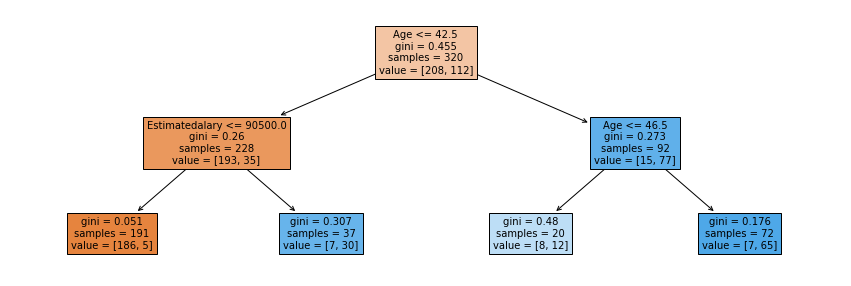

In [136]:
plt.figure(figsize=(15,5))
plot_tree(DTC, filled = True, fontsize=10, feature_names = ["Age", "Estimatedalary"])

# <font color ="green"> Calculate Gini Index

In [137]:
# 0 : 208 and 1 : 112
#formula  = 1 - Prob Square
gini1 = 1 - (208/320)**2 - (112/320)**2
gini2 = 1 - (193/228)**2 - (35/228)**2
round(gini1,3) , round(gini2,3)

(0.455, 0.26)

In [138]:
len(X_train[X_train["Age"]<=42.5])

228

# we can find same for rest of all..

# <font color = "green"> Model - 6 : Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
X = df[["Age","EstimatedSalary"]]
y = df[["Purchased"]]

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=100)

RF = RandomForestClassifier(max_depth = 2) 

RF = RF.fit(X_train,y_train)

In [142]:
y_train_prob = RF.predict_proba(X_train)[:,1] 
y_train_pred = RF.predict(X_train)
RF.score(X_train,y_train)

0.921875

In [143]:
X_train_op = X_train.copy()
X_train_op["y_train_actuals"] = y_train["Purchased"]
X_train_op["y_train_pred"] = y_train_pred
X_train_op.head()


,Age,EstimatedSalary,y_train_actuals,y_train_pred
190,24,84000,0,0
46,25,79000,0,0
50,24,32000,0,0
377,42,53000,0,0
121,37,72000,0,0


In [144]:
accuracy_score(X_train_op["y_train_actuals"],X_train_op["y_train_pred"])

0.921875

In [145]:
accuracy_score(y_test, RF.predict(X_test))

0.9125

Text(0.5, 1.0, 'ConfusionMatrix')

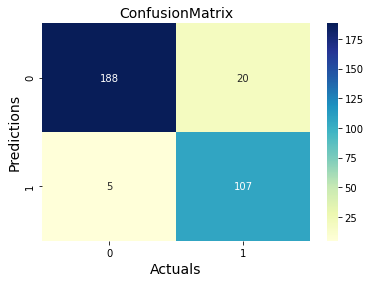

In [146]:
cnf_matrix = confusion_matrix(X_train_op["y_train_actuals"],X_train_op["y_train_pred"])

sns.heatmap(cnf_matrix, annot=True, cmap ="YlGnBu", fmt='.3g')
plt.xlabel("Actuals",fontsize=14)
plt.ylabel("Predictions",fontsize=14)
plt.title("ConfusionMatrix", fontsize=14)

In [147]:
# Bydefault 100 are used, count of trees used. 
RF.n_estimators

100

In [148]:
# find the complete list of decision tree, inthat trees random state will change.
RF.estimators_

[DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=366558600),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1373146938),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=338122713),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1163387403),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=593637506),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=972291679),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=637260518),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=4653318),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=41881271),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=2133356525),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=103

In [162]:
# Trying to plot decision tree
#estimator = RF.estimators_[5]
#from sklearn.tree import export_graphviz
#export_graphviz(estimator, out_file='tree.dot', 
                #feature_names = df["Age", "Estimatedalary"],
               # class_names = df["Purchased"],
                #rounded = True, proportion = False, 
                #precision = 2, filled = True)
#plt.figure(figsize=(15,5))
#plot_tree(estimator, filled = True, fontsize=10, feature_names = df["Age", "Estimatedalary"], class_names=df["Purchased"])

In [150]:
RF.feature_importances_

array([0.55547788, 0.44452212])

In [152]:
indices = np.argsort(RF.feature_importances_)
indices

array([1, 0], dtype=int64)

Text(0.5, 1.0, 'Feature Importance')

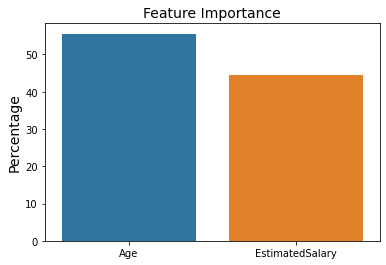

In [153]:
sns.barplot(X_train.columns.tolist(),RF.feature_importances_*100)
plt.ylabel("Percentage", fontsize=14)
plt.title("Feature Importance", fontsize=14)